In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Nassau Candy Distributor.csv")

df = df[(df['Sales'] > 0) & (df['Units'] > 0)]
df['Division'] = df['Division'].str.strip().str.title()

df['Gross_Margin_Percent'] = (df['Gross Profit'] / df['Sales']) * 100

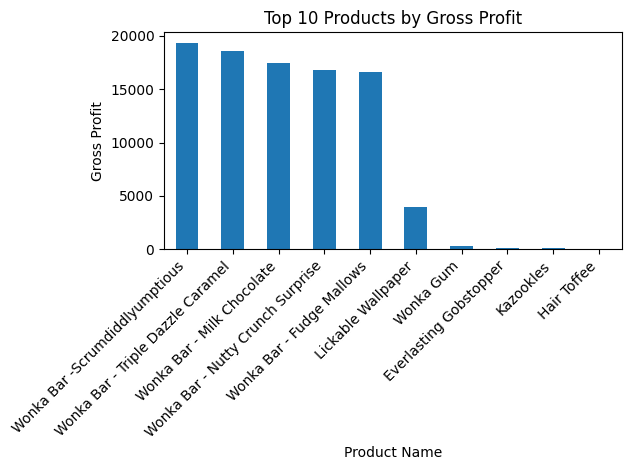

In [2]:
top_products = df.groupby('Product Name')['Gross Profit'].sum().sort_values(ascending=False).head(10)

top_products.plot(kind='bar')
plt.title("Top 10 Products by Gross Profit")
plt.xlabel("Product Name")
plt.ylabel("Gross Profit")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

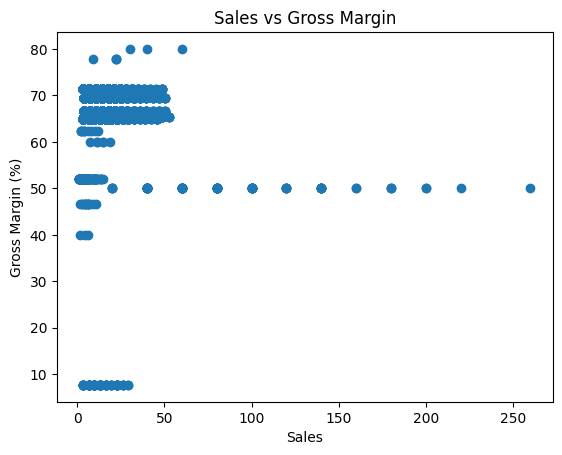

In [3]:
plt.scatter(df['Sales'], df['Gross_Margin_Percent'])
plt.xlabel("Sales")
plt.ylabel("Gross Margin (%)")
plt.title("Sales vs Gross Margin")
plt.show()

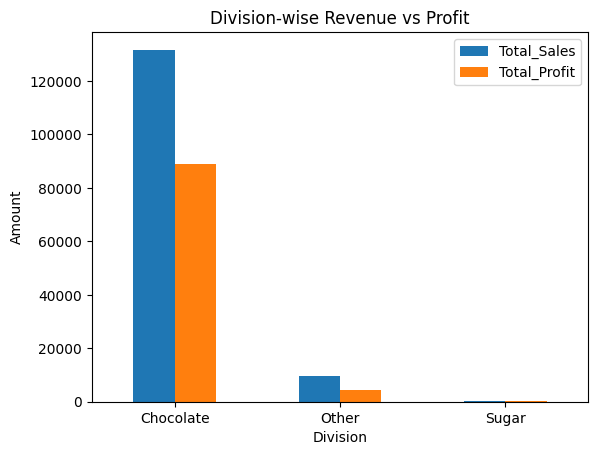

In [4]:
division_summary = df.groupby('Division').agg(
    Total_Sales=('Sales', 'sum'),
    Total_Profit=('Gross Profit', 'sum')
)

division_summary.plot(kind='bar')
plt.title("Division-wise Revenue vs Profit")
plt.xlabel("Division")
plt.ylabel("Amount")
plt.xticks(rotation=0)
plt.show()

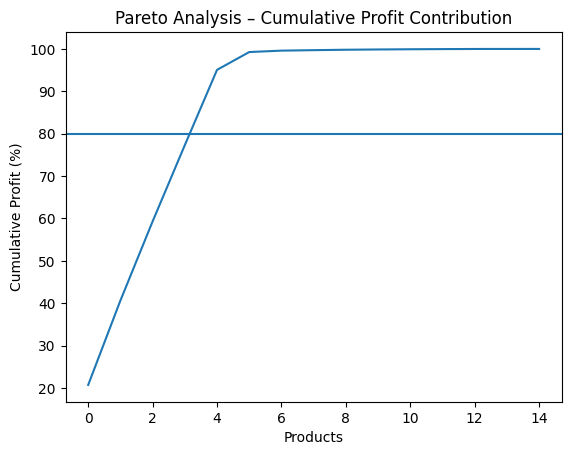

In [5]:
product_profit = df.groupby('Product Name')['Gross Profit'].sum().sort_values(ascending=False)

cumulative_profit = product_profit.cumsum() / product_profit.sum() * 100

plt.plot(cumulative_profit.values)
plt.axhline(80)
plt.title("Pareto Analysis – Cumulative Profit Contribution")
plt.xlabel("Products")
plt.ylabel("Cumulative Profit (%)")
plt.show()

## Visual Insights Summary

Key observations from visual analysis:

- A small subset of products contributes disproportionately to total profit, confirming Pareto behavior.
- Several high-sales products operate at low margins, indicating pricing or cost inefficiencies.
- Certain divisions generate strong revenue but relatively weak profit, suggesting structural margin issues.
- Profit concentration risk exists due to over-dependence on a limited number of products.

These insights support targeted actions such as repricing, cost renegotiation, or portfolio rationalization.
